#### Data Loading

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('Dataset.csv')
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,11,'C1760492708','1','F','28007','M1823072687','28007','es_transportation',52.35,0
1,172,'C1222389110','3','M','28007','M1823072687','28007','es_transportation',14.75,0
2,106,'C879949041','3','F','28007','M1823072687','28007','es_transportation',3.73,0
3,86,'C409740988','5','M','28007','M1823072687','28007','es_transportation',61.42,0
4,152,'C671449181','3','F','28007','M692898500','28007','es_health',9.05,0


In [198]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [199]:
print(df.shape)
print(df.dtypes)
df.head()
df.tail()
df.sample(5)

(535178, 10)
step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
79089,54,'C1950870438','1','F','28007','M1823072687','28007','es_transportation',21.71,0
313236,34,'C791033780','6','F','28007','M78078399','28007','es_wellnessandbeauty',55.78,0
184226,147,'C528277773','0','F','28007','M1823072687','28007','es_transportation',3.45,0
24142,25,'C1884342559','2','F','28007','M348934600','28007','es_transportation',21.20,0
65128,166,'C122290547','3','M','28007','M1823072687','28007','es_transportation',22.37,0


In [200]:
# Null check
df.isnull().sum()

# Data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535178 entries, 0 to 535177
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         535178 non-null  int64  
 1   customer     535178 non-null  object 
 2   age          535178 non-null  object 
 3   gender       535178 non-null  object 
 4   zipcodeOri   535178 non-null  object 
 5   merchant     535178 non-null  object 
 6   zipMerchant  535178 non-null  object 
 7   category     535178 non-null  object 
 8   amount       535178 non-null  float64
 9   fraud        535178 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 40.8+ MB


In [69]:
!git remote -v

origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (fetch)
origin	https://github.com/Rmp2404/HSBC_Hackathon_2025.git (push)


In [29]:
!git remote set-url origin https://github.com/Rmp2404/HSBC_Hackathon_2025.git

In [70]:
!git add .
!git commit -m "Null Values and Data Types"
!git push -u origin main

[main 54a2926] Null Values and Data Types
 1 file changed, 238 insertions(+), 2 deletions(-)
branch 'main' set up to track 'origin/main'.


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   d7a6e1f..54a2926  main -> main


fraud
0    98.786946
1     1.213054
Name: proportion, dtype: float64


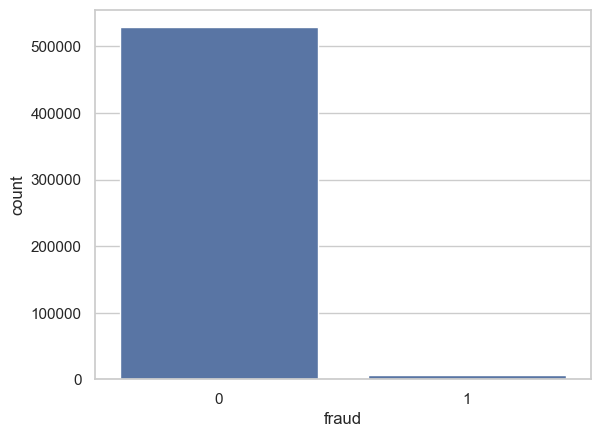

In [201]:
# Distribution of target
sns.countplot(data=df, x='fraud')
fraud_rate = df['fraud'].value_counts(normalize=True) * 100
print(fraud_rate)

In [72]:
!git add .
!git commit -m "Target Distribution and Class Imbalance"
!git push

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


Everything up-to-date


In [202]:
# Unique value count
cat_cols = ['customer', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Check a few example values
df[cat_cols].apply(lambda x: x.unique()[:5])

customer: 4112 unique values
gender: 4 unique values
zipcodeOri: 1 unique values
merchant: 50 unique values
zipMerchant: 1 unique values
category: 15 unique values


customer       ['C1760492708', 'C1222389110', 'C879949041', '...
gender                                      ['F', 'M', 'E', 'U']
zipcodeOri                                             ['28007']
merchant       ['M1823072687', 'M692898500', 'M348934600', 'M...
zipMerchant                                            ['28007']
category       ['es_transportation', 'es_health', 'es_fashion...
dtype: object

In [203]:
# Drop useless columns
df.drop(['zipcodeOri', 'zipMerchant'], axis=1, inplace=True)


In [204]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,11,'C1760492708','1','F','M1823072687','es_transportation',52.35,0
1,172,'C1222389110','3','M','M1823072687','es_transportation',14.75,0
2,106,'C879949041','3','F','M1823072687','es_transportation',3.73,0
3,86,'C409740988','5','M','M1823072687','es_transportation',61.42,0
4,152,'C671449181','3','F','M692898500','es_health',9.05,0
...,...,...,...,...,...,...,...,...
535173,40,'C1913044357','5','F','M348934600','es_transportation',38.12,0
535174,86,'C1341159565','2','F','M348934600','es_transportation',38.63,0
535175,117,'C1048588440','6','M','M1823072687','es_transportation',0.01,0
535176,47,'C1134333439','3','M','M348934600','es_transportation',20.37,0


In [205]:
df_copy=df.copy()

#### Categorical to num conversion and aggregation

In [206]:
customer_agg = df_copy.groupby('customer').agg({
    'amount': ['count', 'sum', 'mean', 'max', 'min', 'std'],
    'step': ['mean', 'max', 'min', 'std'],
    'fraud': ['sum', 'mean'],  # sum = total frauds, mean = fraud rate
}).reset_index()

# Flatten column names
customer_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in customer_agg.columns]


In [207]:
merchant_agg = df_copy.groupby('merchant').agg({
    'amount': ['count', 'sum', 'mean', 'max', 'min', 'std'],
    'step': ['mean', 'max', 'min', 'std'],
    'fraud': ['sum', 'mean'],  # fraud count and rate
}).reset_index()

# Flatten column names
merchant_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in merchant_agg.columns]


In [208]:
df_copy = df_copy.merge(customer_agg, left_on='customer', right_on='customer_', how='left')
df_copy = df_copy.merge(merchant_agg, left_on='merchant', right_on='merchant_', how='left')


In [209]:
df_copy.drop(columns=['customer', 'merchant'], inplace=True)


In [210]:
df_copy

,step,age,gender,category,amount,fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
0,11,'1','F','es_transportation',52.35,0,'C1760492708',163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
1,172,'3','M','es_transportation',14.75,0,'C1222389110',159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
2,106,'3','F','es_transportation',3.73,0,'C879949041',145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
3,86,'5','M','es_transportation',61.42,0,'C409740988',154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
4,152,'3','F','es_health',9.05,0,'C671449181',19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,'M692898500',805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,0.017391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,40,'5','F','es_transportation',38.12,0,'C1913044357',152,4374.15,28.777303,84.43,0.17,18.595297,94.164474,179,5,50.039513,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000
535174,86,'2','F','es_transportation',38.63,0,'C1341159565',120,3487.31,29.060917,95.75,0.41,19.861861,107.675000,179,33,42.055818,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000
535175,117,'6','M','es_transportation',0.01,0,'C1048588440',155,4204.74,27.127355,248.11,0.01,26.641359,88.090323,179,0,52.186276,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
535176,47,'3','M','es_transportation',20.37,0,'C1134333439',124,5004.05,40.355242,309.61,0.02,52.347126,107.032258,179,10,44.899877,2,0.016129,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000


In [211]:
df_copy['age'] = df_copy['age'].str.strip("'")  # Remove surrounding quotes

# Replace 'U' with a placeholder value (like -1 or the mode)
df_copy['age'] = df_copy['age'].replace('U', -1)

# Now convert to int
df_copy['age'] = df_copy['age'].astype(int)


In [84]:
#df['age'] = df['age'].astype(str).str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\R Madhapreetha\AppData\Local\Temp\ipykernel_12132\2858320736.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['age'] = df['age'].astype(str).str.extract('(\d+)').astype(int)


In [212]:
# Convert all except gender/category (which may still be categorical)
for col in df_copy.columns:
    if col not in ['gender', 'category','customer_','merchant_']:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')


In [213]:
df_copy = df_copy.dropna()  # or df.fillna(0) or df.fillna(df.mean())


In [214]:
df_copy

,step,age,gender,category,amount,fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
0,11,1,'F','es_transportation',52.35,0,'C1760492708',163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
1,172,3,'M','es_transportation',14.75,0,'C1222389110',159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
2,106,3,'F','es_transportation',3.73,0,'C879949041',145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
3,86,5,'M','es_transportation',61.42,0,'C409740988',154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
4,152,3,'F','es_health',9.05,0,'C671449181',19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,'M692898500',805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,0.017391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,40,5,'F','es_transportation',38.12,0,'C1913044357',152,4374.15,28.777303,84.43,0.17,18.595297,94.164474,179,5,50.039513,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000
535174,86,2,'F','es_transportation',38.63,0,'C1341159565',120,3487.31,29.060917,95.75,0.41,19.861861,107.675000,179,33,42.055818,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000
535175,117,6,'M','es_transportation',0.01,0,'C1048588440',155,4204.74,27.127355,248.11,0.01,26.641359,88.090323,179,0,52.186276,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
535176,47,3,'M','es_transportation',20.37,0,'C1134333439',124,5004.05,40.355242,309.61,0.02,52.347126,107.032258,179,10,44.899877,2,0.016129,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000


In [215]:
print(df_copy.dtypes)
print(df_copy.head())

step                int64
age                 int64
gender             object
category           object
amount            float64
fraud               int64
customer_          object
amount_count_x      int64
amount_sum_x      float64
amount_mean_x     float64
amount_max_x      float64
amount_min_x      float64
amount_std_x      float64
step_mean_x       float64
step_max_x          int64
step_min_x          int64
step_std_x        float64
fraud_sum_x         int64
fraud_mean_x      float64
merchant_          object
amount_count_y      int64
amount_sum_y      float64
amount_mean_y     float64
amount_max_y      float64
amount_min_y      float64
amount_std_y      float64
step_mean_y       float64
step_max_y          int64
step_min_y          int64
step_std_y        float64
fraud_sum_y         int64
fraud_mean_y      float64
dtype: object
   step  age gender             category  amount  fraud      customer_  \
0    11    1    'F'  'es_transportation'   52.35      0  'C1760492708'   
1   17

In [216]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid changing the original
df_encoded = df_copy.copy()

# List of categorical columns to encode
categorical_cols = ['gender', 'category']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [217]:
df_encoded

,step,age,gender,category,amount,fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y
0,11,1,1,12,52.35,0,'C1760492708',163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
1,172,3,2,12,14.75,0,'C1222389110',159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
2,106,3,1,12,3.73,0,'C879949041',145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
3,86,5,2,12,61.42,0,'C409740988',154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
4,152,3,1,4,9.05,0,'C671449181',19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,'M692898500',805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,0.017391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,40,5,1,12,38.12,0,'C1913044357',152,4374.15,28.777303,84.43,0.17,18.595297,94.164474,179,5,50.039513,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000
535174,86,2,1,12,38.63,0,'C1341159565',120,3487.31,29.060917,95.75,0.41,19.861861,107.675000,179,33,42.055818,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000
535175,117,6,2,12,0.01,0,'C1048588440',155,4204.74,27.127355,248.11,0.01,26.641359,88.090323,179,0,52.186276,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000
535176,47,3,2,12,20.37,0,'C1134333439',124,5004.05,40.355242,309.61,0.02,52.347126,107.032258,179,10,44.899877,2,0.016129,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000


In [218]:
print(df_encoded.dtypes)
print(df_encoded.head())

step                int64
age                 int64
gender              int64
category            int64
amount            float64
fraud               int64
customer_          object
amount_count_x      int64
amount_sum_x      float64
amount_mean_x     float64
amount_max_x      float64
amount_min_x      float64
amount_std_x      float64
step_mean_x       float64
step_max_x          int64
step_min_x          int64
step_std_x        float64
fraud_sum_x         int64
fraud_mean_x      float64
merchant_          object
amount_count_y      int64
amount_sum_y      float64
amount_mean_y     float64
amount_max_y      float64
amount_min_y      float64
amount_std_y      float64
step_mean_y       float64
step_max_y          int64
step_min_y          int64
step_std_y        float64
fraud_sum_y         int64
fraud_mean_y      float64
dtype: object
   step  age  gender  category  amount  fraud      customer_  amount_count_x  \
0    11    1       1        12   52.35      0  'C1760492708'             1

#### Feature Engineering


In [219]:
df_encoded['transaction_id'] = df_encoded.index

In [220]:
import featuretools as ft

# Create an empty EntitySet
es = ft.EntitySet(id="fraud_data")

# Add the base dataframe
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df_encoded.drop(columns=['fraud']),  # Drop target to prevent leakage
    index="transaction_id",                # You must have a unique ID column            
)


C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\P

In [221]:
df_encoded

,step,age,gender,category,amount,fraud,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y,transaction_id
0,11,1,1,12,52.35,0,'C1760492708',163,4842.39,29.707914,160.41,0.24,24.835121,90.269939,178,0,51.235364,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000,0
1,172,3,2,12,14.75,0,'C1222389110',159,4675.80,29.407547,194.83,0.17,25.339354,89.584906,179,0,53.253431,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000,1
2,106,3,1,12,3.73,0,'C879949041',145,4209.03,29.027793,135.92,0.34,20.905876,89.593103,178,2,52.472148,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000,2
3,86,5,2,12,61.42,0,'C409740988',154,4854.42,31.522208,189.11,0.53,27.177598,92.623377,179,0,50.845669,1,0.006494,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000,3
4,152,3,1,4,9.05,0,'C671449181',19,1609.01,84.684737,316.03,9.05,76.658094,102.631579,163,0,53.958019,0,0.000000,'M692898500',805,88352.14,109.754211,904.51,0.18,96.326950,77.915528,179,0,50.150126,14,0.017391,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,40,5,1,12,38.12,0,'C1913044357',152,4374.15,28.777303,84.43,0.17,18.595297,94.164474,179,5,50.039513,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000,535173
535174,86,2,1,12,38.63,0,'C1341159565',120,3487.31,29.060917,95.75,0.41,19.861861,107.675000,179,33,42.055818,0,0.000000,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000,535174
535175,117,6,2,12,0.01,0,'C1048588440',155,4204.74,27.127355,248.11,0.01,26.641359,88.090323,179,0,52.186276,0,0.000000,'M1823072687',269636,7267890.28,26.954451,115.26,0.00,17.536763,107.562651,179,0,47.302679,0,0.000000,535175
535176,47,3,2,12,20.37,0,'C1134333439',124,5004.05,40.355242,309.61,0.02,52.347126,107.032258,179,10,44.899877,2,0.016129,'M348934600',184938,4983444.75,26.946570,118.07,0.00,17.528205,76.560545,179,0,50.704773,0,0.000000,535176


In [222]:
# Normalize customer entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="customers",
    index="customer_"
)

# Normalize merchant entity
es = es.normalize_dataframe(
    base_dataframe_name="transactions",
    new_dataframe_name="merchants",
    index="merchant_"
)


In [223]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="transactions",
    agg_primitives=["mean", "sum", "count", "mode", "std", "max", "min"],
    trans_primitives=["month", "weekday", "hour", "day"],
    max_depth=2,
    verbose=True
)

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'hour', 'month', 'weekday']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 325 features
Elapsed: 00:00 | Progress:   0%|                                                                                       

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function std at 0x000001F1B568A520> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x000001F1B5689B20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided calla

Elapsed: 00:02 | Progress:  29%|█████████████████████████▎                                                             

C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x000001F1B56899E0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x000001F1B5688FE0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg(to_agg)
C:\Users\R Madhapreetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:785: FutureWarning: The provided calla

Elapsed: 00:37 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


In [224]:
print(feature_matrix.head())

                step  age  gender  category  amount      customer_  \
transaction_id                                                       
0                 11    1       1        12   52.35  'C1760492708'   
1                172    3       2        12   14.75  'C1222389110'   
2                106    3       1        12    3.73   'C879949041'   
3                 86    5       2        12   61.42   'C409740988'   
4                152    3       1         4    9.05   'C671449181'   

                amount_count_x  amount_sum_x  amount_mean_x  amount_max_x  \
transaction_id                                                              
0                          163       4842.39      29.707914        160.41   
1                          159       4675.80      29.407547        194.83   
2                          145       4209.03      29.027793        135.92   
3                          154       4854.42      31.522208        189.11   
4                           19       1609.01   

In [187]:
feature_matrix.head(20).style.set_sticky()

In [225]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['customer_', 'merchant_']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    feature_matrix[col] = le.fit_transform(feature_matrix[col])


In [226]:
feature_matrix = feature_matrix.reset_index()  # To bring transaction_id into a column
df['transaction_id'] = df.index                # If not already there

# Merge back the target
feature_matrix = feature_matrix.merge(df[['transaction_id', 'fraud']], on='transaction_id', how='left')

In [189]:
!git add .
!git commit -m "Feature Engineering"
!git push

[main 387f88b] Feature Engineering
 2 files changed, 6997 insertions(+), 2545 deletions(-)


To https://github.com/Rmp2404/HSBC_Hackathon_2025.git
   54a2926..387f88b  main -> main


In [227]:
feature_matrix

,transaction_id,step,age,gender,category,amount,customer_,amount_count_x,amount_sum_x,amount_mean_x,amount_max_x,amount_min_x,amount_std_x,step_mean_x,step_max_x,step_min_x,step_std_x,fraud_sum_x,fraud_mean_x,merchant_,amount_count_y,amount_sum_y,amount_mean_y,amount_max_y,amount_min_y,amount_std_y,step_mean_y,step_max_y,step_min_y,step_std_y,fraud_sum_y,fraud_mean_y,customers.COUNT(transactions),customers.MAX(transactions.age),customers.MAX(transactions.amount),customers.MAX(transactions.amount_count_x),customers.MAX(transactions.amount_count_y),customers.MAX(transactions.amount_max_x),customers.MAX(transactions.amount_max_y),customers.MAX(transactions.amount_mean_x),customers.MAX(transactions.amount_mean_y),customers.MAX(transactions.amount_min_x),customers.MAX(transactions.amount_min_y),customers.MAX(transactions.amount_std_x),customers.MAX(transactions.amount_std_y),customers.MAX(transactions.amount_sum_x),customers.MAX(transactions.amount_sum_y),customers.MAX(transactions.category),customers.MAX(transactions.fraud_mean_x),customers.MAX(transactions.fraud_mean_y),customers.MAX(transactions.fraud_sum_x),customers.MAX(transactions.fraud_sum_y),customers.MAX(transactions.gender),customers.MAX(transactions.step),customers.MAX(transactions.step_max_x),customers.MAX(transactions.step_max_y),customers.MAX(transactions.step_mean_x),customers.MAX(transactions.step_mean_y),customers.MAX(transactions.step_min_x),customers.MAX(transactions.step_min_y),customers.MAX(transactions.step_std_x),customers.MAX(transactions.step_std_y),customers.MEAN(transactions.age),customers.MEAN(transactions.amount),customers.MEAN(transactions.amount_count_x),customers.MEAN(transactions.amount_count_y),customers.MEAN(transactions.amount_max_x),customers.MEAN(transactions.amount_max_y),customers.MEAN(transactions.amount_mean_x),customers.MEAN(transactions.amount_mean_y),customers.MEAN(transactions.amount_min_x),customers.MEAN(transactions.amount_min_y),customers.MEAN(transactions.amount_std_x),customers.MEAN(transactions.amount_std_y),customers.MEAN(transactions.amount_sum_x),customers.MEAN(transactions.amount_sum_y),customers.MEAN(transactions.category),customers.MEAN(transactions.fraud_mean_x),customers.MEAN(transactions.fraud_mean_y),customers.MEAN(transactions.fraud_sum_x),customers.MEAN(transactions.fraud_sum_y),customers.MEAN(transactions.gender),customers.MEAN(transactions.step),customers.MEAN(transactions.step_max_x),customers.MEAN(transactions.step_max_y),customers.MEAN(transactions.step_mean_x),customers.MEAN(transactions.step_mean_y),customers.MEAN(transactions.step_min_x),customers.MEAN(transactions.step_min_y),customers.MEAN(transactions.step_std_x),customers.MEAN(transactions.step_std_y),customers.MIN(transactions.age),customers.MIN(transactions.amount),customers.MIN(transactions.amount_count_x),customers.MIN(transactions.amount_count_y),customers.MIN(transactions.amount_max_x),customers.MIN(transactions.amount_max_y),customers.MIN(transactions.amount_mean_x),customers.MIN(transactions.amount_mean_y),customers.MIN(transactions.amount_min_x),customers.MIN(transactions.amount_min_y),customers.MIN(transactions.amount_std_x),customers.MIN(transactions.amount_std_y),customers.MIN(transactions.amount_sum_x),customers.MIN(transactions.amount_sum_y),customers.MIN(transactions.category),customers.MIN(transactions.fraud_mean_x),customers.MIN(transactions.fraud_mean_y),customers.MIN(transactions.fraud_sum_x),customers.MIN(transactions.fraud_sum_y),customers.MIN(transactions.gender),customers.MIN(transactions.step),customers.MIN(transactions.step_max_x),customers.MIN(transactions.step_max_y),customers.MIN(transactions.step_mean_x),customers.MIN(transactions.step_mean_y),customers.MIN(transactions.step_min_x),customers.MIN(transactions.step_min_y),customers.MIN(transactions.step_std_x),customers.MIN(transactions.step_std_y),customers.MODE(transactions.merchant_),customers.STD(transactions.age),customers.STD(transactions.amount),customers.STD(transactions.

#### Train-Test split

In [240]:
from sklearn.model_selection import train_test_split

X = feature_matrix.drop(columns=['transaction_id', 'fraud'])
y = feature_matrix['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [239]:
object_columns = feature_matrix.columns[feature_matrix.dtypes == 'object']
print(object_columns)

Index([], dtype='object')


In [234]:
print(X_train.dtypes[X_train.dtypes == 'object'])


Series([], dtype: object)


In [242]:
categorical_cols = X_encoded.select_dtypes(include=['category', 'object']).columns
print(categorical_cols)


Index(['customers.MODE(transactions.merchant_)', 'merchants.MODE(transactions.customer_)'], dtype='object')


In [243]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])


##### SMOTE

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1. Copy the data to avoid overwriting
X_encoded = X_train.copy()

# 2. Encode all object or category columns
for col in X_encoded.select_dtypes(include=['float64']).columns:
    if (X_encoded[col] % 1 != 0).any():  # check if any values are non-integer
        X_encoded[col] = X_encoded[col].round().astype('int64')  # or use floor
    else:
        X_encoded[col] = X_encoded[col].astype('int64')


# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)


In [60]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
# Make a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Convert 'age' column to string type to ensure compatibility with OneHotEncoder
df_encoded['age'] = df_encoded['age'].astype(str)

# Select categorical columns for one-hot encoding
categorical_cols = ['age', 'gender', 'category']

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_encoded[categorical_cols])

# Create a DataFrame for the encoded features
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_encoded.index)


In [15]:
encoded_df

,age_'0',age_'1',age_'2',age_'3',age_'4',age_'5',age_'6',age_'U',gender_'E',gender_'F',gender_'M',gender_'U',category_'es_barsandrestaurants',category_'es_contents',category_'es_fashion',category_'es_food',category_'es_health',category_'es_home',category_'es_hotelservices',category_'es_hyper',category_'es_leisure',category_'es_otherservices',category_'es_sportsandtoys',category_'es_tech',category_'es_transportation',category_'es_travel',category_'es_wellnessandbeauty'
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535173,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535175,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
535176,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
